# 4주차 실습문제: 조건에 따른 열 추가 & 데이터 시각화

***

## 1차 제출(~수업시간 종료)

In [2]:
# 아래와 같이 필요한 라이브러리를 임포트 합니다.
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

# 시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

# 한글 폰트 설정 (맑은고딕)
plt.rc('font', family='Malgun Gothic') # For Windows

# 소수점 3자리 숫자까지 표시
%precision 3

'%.3f'

In [4]:
data = pd.read_csv('health2018.csv')

In [5]:
data1 = pd.read_csv('health2018.csv')
data1.head(5)

,ID,sex,age,height,weight,waist,BMI,Blood_glucose
0,A901020501,M,80,162.4,56.0,82.2,21.233226,103
1,A901021301,M,78,167.7,76.4,98.3,27.166096,127
2,A901021302,F,75,157.7,53.2,80.7,21.391845,134
3,A901022601,F,43,151.0,53.5,79.7,23.463883,99
4,A901023303,F,80,146.1,57.6,93.0,26.984977,111


## 1. 정상 vs. 비만 간의 통계량 비교 및 시각화
### 1-1) state 열을 추가해서 BMI >= 25인 사람은 'Obese', BMI < 25인 사람은 'Normal'으로 기록하시오.

In [6]:
data['state'] = ['Obese' if b >= 25 else 'Normal' for b in data['BMI']] 
#데이터 'bmi' 를 b에 넣는 루프를 돌리고, if문 실행
data

,ID,sex,age,height,weight,waist,BMI,Blood_glucose,state
0,A901020501,M,80,162.4,56.0,82.2,21.233226,103,Normal
1,A901021301,M,78,167.7,76.4,98.3,27.166096,127,Obese
2,A901021302,F,75,157.7,53.2,80.7,21.391845,134,Normal
3,A901022601,F,43,151.0,53.5,79.7,23.463883,99,Normal
4,A901023303,F,80,146.1,57.6,93.0,26.984977,111,Obese
...,...,...,...,...,...,...,...,...,...
5963,R904028502,F,35,159.8,55.6,70.1,21.773149,90,Normal
5964,R904028503,F,66,156.9,63.9,87.3,25.957028,93,Obese
5965,R904028902,F,73,145.2,51.8,77.2,24.569512,99,Normal
5966,R904029201,M,43,176.8,84.1,99.2,26.904906,108,Obese


### 1-2) 정상 vs. 비만인에서 혈당값(Blood_glucose)의 분포 차이를, boxplot과 violinplot로 그려 비교하시오.

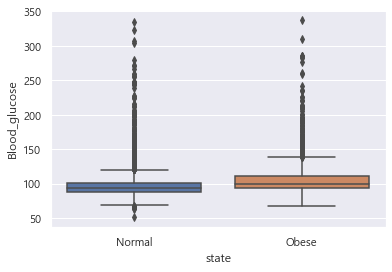

In [8]:
sns.boxplot(x = "state", y  = "Blood_glucose", data = data)

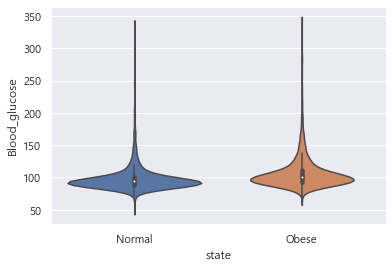

In [5]:
sns.violinplot(x = "state", y  = "Blood_glucose", data = data)

### 1-3) Diabete 열을 추가해서 혈당값이 126 이상인 환자를 1로, 그렇지 않은 정상인을 0으로 기록하고, 정상 체중과 비만 체중 각각에서 당뇨병 환자의 비율을 구하시오.

In [110]:
data['Diabete'] = [1 if b>=126 else '0' for b in data['Blood_glucose']]
data

,ID,sex,age,height,weight,waist,BMI,Blood_glucose,state,Diabete,normal,obese,age_bmi
0,A901020501,M,80,162.4,56.0,82.2,21.233226,103,Normal,0,1,0,normal
1,A901021301,M,78,167.7,76.4,98.3,27.166096,127,Obese,1,0,1,비만
2,A901021302,F,75,157.7,53.2,80.7,21.391845,134,Normal,1,1,0,normal
3,A901022601,F,43,151.0,53.5,79.7,23.463883,99,Normal,0,1,0,normal
4,A901023303,F,80,146.1,57.6,93.0,26.984977,111,Obese,0,0,1,비만
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5963,R904028502,F,35,159.8,55.6,70.1,21.773149,90,Normal,0,1,0,normal
5964,R904028503,F,66,156.9,63.9,87.3,25.957028,93,Obese,0,0,1,비만
5965,R904028902,F,73,145.2,51.8,77.2,24.569512,99,Normal,0,1,0,normal
5966,R904029201,M,43,176.8,84.1,99.2,26.904906,108,Obese,0,0,1,비만


In [111]:
data['normal'] = np.where(data['state'] == 'Normal', 1, 0)
data['obese'] = np.where(data['state'] == 'Obese', 1,0)
a = data['normal'].sum()
b = data['obese'].sum()

In [112]:
normal_diabete = len(data[(data.Diabete == 1) & (data.state ==  'Normal')])/a
obese_diabete = len(data[(data.Diabete == 1) & (data.state ==  'Obese')])/b
print(normal_diabete, obese_diabete)

0.0633658286300667 0.13091787439613525


In [113]:
data['Diabete']=np.where(data['Blood_glucose'] >= 126,1,0)
data[data.state == 'Normal']['Diabete']
data[data.state == 'Normal']['Diabete'].mean()

0.063

## 2. 연령별 비만 유병율 시각화
### 2-1) 20대, 30대, 40대, 50대, 60대, 70대로 그룹을 나누고, 각 연령별 BMI의 분포를 violinplot으로 비교하시오.
x축 레이블로 20대, 30대, 40대, 50대, 60대, 70대가 명시되도록 할 것. (힌트: violinplot에 order=[...] 옵션으로 순서 지정)

In [7]:
age_list = [(data1.age>=20) &(data1.age<30), 
            (data1.age>=30) &(data1.age<40), 
            (data1.age>=40) &(data1.age<50),
            (data1.age>=50) &(data1.age<60),
            (data1.age>=60) &(data1.age<70),
            (data1.age>=70)]
choice_list=['20대','30대','40대','50대','60대','70대']
data1['age_group']=np.select(age_list,choice_list)
data1

,ID,sex,age,height,weight,waist,BMI,Blood_glucose,age_bmi,age_group
0,A901020501,M,80,162.4,56.0,82.2,21.233226,103,정상,70대
1,A901021301,M,78,167.7,76.4,98.3,27.166096,127,비만,70대
2,A901021302,F,75,157.7,53.2,80.7,21.391845,134,정상,70대
3,A901022601,F,43,151.0,53.5,79.7,23.463883,99,정상,40대
4,A901023303,F,80,146.1,57.6,93.0,26.984977,111,비만,70대
...,...,...,...,...,...,...,...,...,...,...
5963,R904028502,F,35,159.8,55.6,70.1,21.773149,90,정상,30대
5964,R904028503,F,66,156.9,63.9,87.3,25.957028,93,비만,60대
5965,R904028902,F,73,145.2,51.8,77.2,24.569512,99,정상,70대
5966,R904029201,M,43,176.8,84.1,99.2,26.904906,108,비만,40대


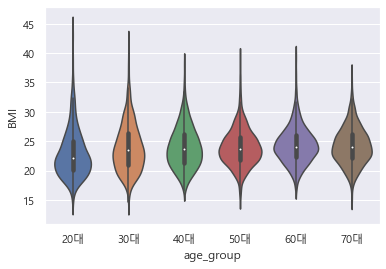

In [98]:
sns.violinplot(x = 'age_group', y  = "BMI", data = data1, order=['20대','30대','40대','50대','60대','70대'])

## 2차 추가제출

### 2-2) 각 연령대별로 비만(BMI 25~30), 고도비만(BMI >= 30)인 사람의 비율을 구하시오.
obs_ratio, obs2_ratio로 각각 저장할 것.

In [81]:
##obs_ratio : 비만을 1, 고도비만을 2로 설정
bmi_list = [(data1.BMI>=25)&(data1.BMI<30),
           (data1.BMI>=30) ]
choice1_list = ['비만','고도비만']
data1['age_bmi'] = np.select(bmi_list, choice1_list,default = '정상')
data1

,ID,sex,age,height,weight,waist,BMI,Blood_glucose,age_bmi,age_group
0,A901020501,M,80,162.4,56.0,82.2,21.233226,103,정상,70대
1,A901021301,M,78,167.7,76.4,98.3,27.166096,127,비만,70대
2,A901021302,F,75,157.7,53.2,80.7,21.391845,134,정상,70대
3,A901022601,F,43,151.0,53.5,79.7,23.463883,99,정상,40대
4,A901023303,F,80,146.1,57.6,93.0,26.984977,111,비만,70대
...,...,...,...,...,...,...,...,...,...,...
5963,R904028502,F,35,159.8,55.6,70.1,21.773149,90,정상,30대
5964,R904028503,F,66,156.9,63.9,87.3,25.957028,93,비만,60대
5965,R904028902,F,73,145.2,51.8,77.2,24.569512,99,정상,70대
5966,R904029201,M,43,176.8,84.1,99.2,26.904906,108,비만,40대


In [82]:
data1['age_bmi']=np.where(data1['age_bmi']=='비만', 1,0)

In [83]:
a = data1[data1.age_group=='20대']
b = data1[data1.age_group=='30대']
c = data1[data1.age_group=='40대']
d = data1[data1.age_group=='50대']
e = data1[data1.age_group=='60대']
f = data1[data1.age_group=='70대']

In [84]:
obs_ratio =[a['age_bmi'].mean(),
            b['age_bmi'].mean(),
            c['age_bmi'].mean(),
            d['age_bmi'].mean(),
            e['age_bmi'].mean(),
            f['age_bmi'].mean()]
obs_ratio

[0.184, 0.276, 0.301, 0.300, 0.336, 0.334]

In [85]:
#반대로 비만을 0, 고도비만을 1로 하는 설정
bmi_list = [(data1.BMI>=25)&(data1.BMI<30),
           (data1.BMI>=30) ]
choice1_list = ['비만','고도비만']
data1['age_bmi'] = np.select(bmi_list, choice1_list,default = '정상')

In [86]:
data1['age_bmi']=np.where(data1['age_bmi']== '고도비만', 1,0)

In [88]:
a = data1[data1.age_group=='20대']
b = data1[data1.age_group=='30대']
c = data1[data1.age_group=='40대']
d = data1[data1.age_group=='50대']
e = data1[data1.age_group=='60대']
f = data1[data1.age_group=='70대']

In [89]:
obs2_ratio =[a['age_bmi'].mean(),
            b['age_bmi'].mean(),
            c['age_bmi'].mean(),
            d['age_bmi'].mean(),
            e['age_bmi'].mean(),
            f['age_bmi'].mean()]
obs2_ratio

[0.069, 0.078, 0.057, 0.035, 0.044, 0.047]

### 2-3) 연령대별 비만, 고도비만의 비율을 누적 막대그래프로 그리시오.
고도비만(BMI >= 30)을 아래쪽에 먼저 그리고, 비만(BMI: 25~30)을 그 위에 쌓는 꼴로 그리시오. (아래 예시 참조)
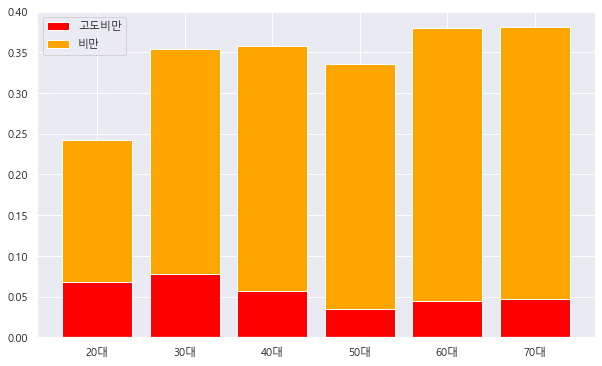

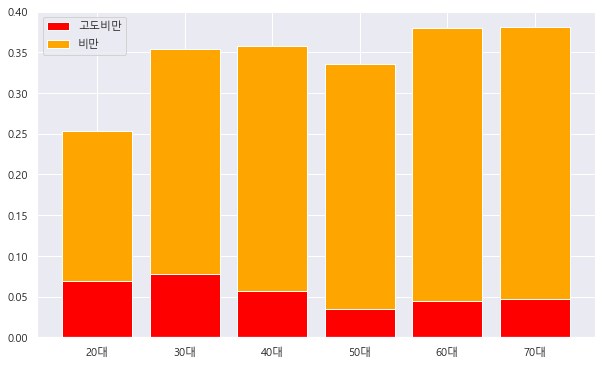

In [90]:
x =['20대','30대','40대','50대','60대','70대']

plt.figure(figsize = (10, 6))
p1 = plt.bar(x, obs2_ratio, color = 'red')
p2 = plt.bar(x, obs_ratio, bottom = obs2_ratio, color='orange')
plt.legend((p1[0], p2[0]), ('고도비만', '비만'))

### 2-4) (보너스 문제) 남성/여성으로 나누어서 위 2-3) 그래프를 그리고 그 차이를 비교해보시오.

### 남성 그래프

In [96]:
#male_obs_ratio : 비만을 1, 고도비만을 0로 설정
bmi_list = [(data1.BMI>=25)&(data1.BMI<30),
           (data1.BMI>=30) ]
choice1_list = ['비만','고도비만']
data1['age_bmi'] = np.select(bmi_list, choice1_list,default = '정상')
data1

,ID,sex,age,height,weight,waist,BMI,Blood_glucose,age_bmi,age_group
0,A901020501,M,80,162.4,56.0,82.2,21.233226,103,정상,70대
1,A901021301,M,78,167.7,76.4,98.3,27.166096,127,비만,70대
2,A901021302,F,75,157.7,53.2,80.7,21.391845,134,정상,70대
3,A901022601,F,43,151.0,53.5,79.7,23.463883,99,정상,40대
4,A901023303,F,80,146.1,57.6,93.0,26.984977,111,비만,70대
...,...,...,...,...,...,...,...,...,...,...
5963,R904028502,F,35,159.8,55.6,70.1,21.773149,90,정상,30대
5964,R904028503,F,66,156.9,63.9,87.3,25.957028,93,비만,60대
5965,R904028902,F,73,145.2,51.8,77.2,24.569512,99,정상,70대
5966,R904029201,M,43,176.8,84.1,99.2,26.904906,108,비만,40대


In [97]:
data1['age_bmi']=np.where(data1['age_bmi']=='비만', 1,0)

In [98]:
am=data1[(data1.age_group=='20대')&(data1.sex=='M')]
bm=data1[(data1.age_group=='30대')&(data1.sex=='M')]
cm=data1[(data1.age_group=='40대')&(data1.sex=='M')]
dm=data1[(data1.age_group=='50대')&(data1.sex=='M')]
em=data1[(data1.age_group=='60대')&(data1.sex=='M')]
fm=data1[(data1.age_group=='70대')&(data1.sex=='M')]

In [100]:
male_obs_ratio =[am['age_bmi'].mean(),
                 bm['age_bmi'].mean(),
                 cm['age_bmi'].mean(),
                 dm['age_bmi'].mean(),
                 em['age_bmi'].mean(),
                 fm['age_bmi'].mean()]
male_obs_ratio

[0.252, 0.409, 0.416, 0.394, 0.363, 0.293]

In [111]:
#male_obs2_ratio : 비만을 0, 고도비만을 1로 설정

bmi_list = [(data1.BMI>=25)&(data1.BMI<30),
           (data1.BMI>=30) ]
choice1_list = ['비만','고도비만']
data1['age_bmi'] = np.select(bmi_list, choice1_list,default = '정상')

In [105]:
data1['age_bmi']=np.where(data1['age_bmi']=='고도비만', 1,0)

In [106]:
am=data1[(data1.age_group=='20대')&(data1.sex=='M')]
bm=data1[(data1.age_group=='30대')&(data1.sex=='M')]
cm=data1[(data1.age_group=='40대')&(data1.sex=='M')]
dm=data1[(data1.age_group=='50대')&(data1.sex=='M')]
em=data1[(data1.age_group=='60대')&(data1.sex=='M')]
fm=data1[(data1.age_group=='70대')&(data1.sex=='M')]

In [107]:
male_obs2_ratio =[am['age_bmi'].mean(),
                 bm['age_bmi'].mean(),
                 cm['age_bmi'].mean(),
                 dm['age_bmi'].mean(),
                 em['age_bmi'].mean(),
                 fm['age_bmi'].mean()]
male_obs2_ratio

[0.109, 0.101, 0.075, 0.022, 0.027, 0.033]

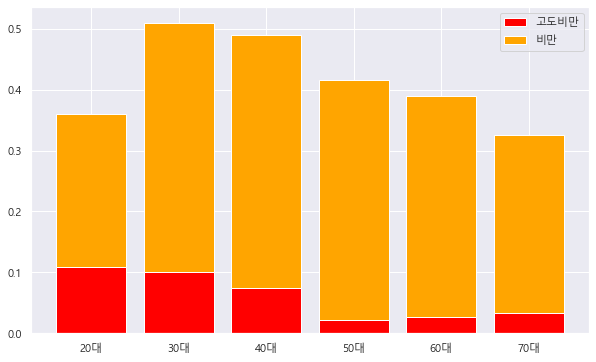

In [110]:
x =['20대','30대','40대','50대','60대','70대']

plt.figure(figsize = (10, 6))
p1 = plt.bar(x, male_obs2_ratio, color = 'red')
p2 = plt.bar(x, male_obs_ratio, bottom = male_obs2_ratio, color='orange')
plt.legend((p1[0], p2[0]), ('고도비만', '비만'))

### 여성 그래프

In [128]:
#female_obs_ratio : 비만을 1, 고도비만을 2로 설정
bmi_list = [(data1.BMI>=25)&(data1.BMI<30),
           (data1.BMI>=30) ]
choice1_list = ['비만','고도비만']
data1['age_bmi'] = np.select(bmi_list, choice1_list,default = '정상')
data1

,ID,sex,age,height,weight,waist,BMI,Blood_glucose,age_bmi,age_group
0,A901020501,M,80,162.4,56.0,82.2,21.233226,103,정상,70대
1,A901021301,M,78,167.7,76.4,98.3,27.166096,127,비만,70대
2,A901021302,F,75,157.7,53.2,80.7,21.391845,134,정상,70대
3,A901022601,F,43,151.0,53.5,79.7,23.463883,99,정상,40대
4,A901023303,F,80,146.1,57.6,93.0,26.984977,111,비만,70대
...,...,...,...,...,...,...,...,...,...,...
5963,R904028502,F,35,159.8,55.6,70.1,21.773149,90,정상,30대
5964,R904028503,F,66,156.9,63.9,87.3,25.957028,93,비만,60대
5965,R904028902,F,73,145.2,51.8,77.2,24.569512,99,정상,70대
5966,R904029201,M,43,176.8,84.1,99.2,26.904906,108,비만,40대


In [129]:
data1['age_bmi']=np.where(data1['age_bmi']=='비만', 1,0)

In [130]:
af=data1[(data1.age_group=='20대')&(data1.sex=='F')]
bf=data1[(data1.age_group=='30대')&(data1.sex=='F')]
cf=data1[(data1.age_group=='40대')&(data1.sex=='F')]
df=data1[(data1.age_group=='50대')&(data1.sex=='F')]
ef=data1[(data1.age_group=='60대')&(data1.sex=='F')]
ff=data1[(data1.age_group=='70대')&(data1.sex=='F')]

In [131]:
female_obs_ratio =[af['age_bmi'].mean(),
                 bf['age_bmi'].mean(),
                 cf['age_bmi'].mean(),
                 df['age_bmi'].mean(),
                 ef['age_bmi'].mean(),
                 ff['age_bmi'].mean()]
female_obs_ratio

[0.123, 0.164, 0.217, 0.231, 0.314, 0.364]

In [132]:
#female_obs2_ratio : 비만을 1, 고도비만을 2로 설정

bmi_list = [(data1.BMI>=25)&(data1.BMI<30),
           (data1.BMI>=30) ]
choice1_list = ['비만','고도비만']
data1['age_bmi'] = np.select(bmi_list, choice1_list,default = '정상')

In [133]:
data1['age_bmi']=np.where(data1['age_bmi']=='고도비만', 1,0)


In [135]:
af=data1[(data1.age_group=='20대')&(data1.sex=='F')]
bf=data1[(data1.age_group=='30대')&(data1.sex=='F')]
cf=data1[(data1.age_group=='40대')&(data1.sex=='F')]
df=data1[(data1.age_group=='50대')&(data1.sex=='F')]
ef=data1[(data1.age_group=='60대')&(data1.sex=='F')]
ff=data1[(data1.age_group=='70대')&(data1.sex=='F')]

In [136]:
female_obs2_ratio =[af['age_bmi'].mean(),
                 bf['age_bmi'].mean(),
                 cf['age_bmi'].mean(),
                 df['age_bmi'].mean(),
                 ef['age_bmi'].mean(),
                 ff['age_bmi'].mean()]
female_obs2_ratio

[0.034, 0.059, 0.044, 0.045, 0.058, 0.058]

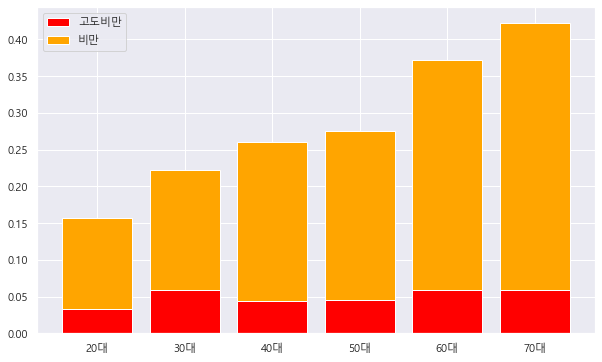

In [137]:
x =['20대','30대','40대','50대','60대','70대']

plt.figure(figsize = (10, 6))
p1 = plt.bar(x, female_obs2_ratio, color = 'red')
p2 = plt.bar(x, female_obs_ratio, bottom = female_obs2_ratio, color='orange')
plt.legend((p1[0], p2[0]), ('고도비만', '비만'))

In [138]:
# 두 그래프 차이를 살펴보면 남성은 20~30 대에 비만인 사람이 많고, 나이가 들수록 감소하는 추세이다.
# 하지만, 20~40대 남성 중 고도비만인 사람은 많다. 반면에 여성은 나이가 많을수록 비만인 사람이 증가하는 것을 알 수 있다.

## 3차 추가제출 없음. 당일 자정까지 완료함